# Loading the Live Data

In [10]:
%cd "/content/drive/Othercomputers/My MacBook Air/CSE 847 Machine Learninng/MSU-CSE-847-Homeworks/HW-04"

!git clone https://github.com/jiayuzhou/CSE847.git
%mv CSE847/data/spam_email . 

%rm -rf sample_data/ 
%rm -rf CSE847/

import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
os.makedirs('plots', exist_ok=True)




# Loading the data file
X_df = pd.read_csv("spam_email/data.txt", header = None, delimiter="  ")
y_df = pd.read_csv("spam_email/labels.txt", header = None)

# Converting [1/0] label to [+1/-1] labeling scheme
y_df = y_df*2-1

# Adding one extra columns for the bias term in the calculation
X_df[len(X_df.columns)]=1.0


# Splitting up the train and test dataset.
X_test = X_df.loc[2000:].copy()
y_test = y_df.loc[2000:].copy()
n_values = [200, 500, 800, 1000, 1500, 2000]

/content/drive/Othercomputers/My MacBook Air/CSE 847 Machine Learninng/MSU-CSE-847-Homeworks/HW-04
Cloning into 'CSE847'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 42 (delta 3), reused 0 (delta 0), pack-reused 34
Unpacking objects: 100% (42/42), done.


In [17]:
def sigmoid(X):
    """
    Simple sigmoid function.
    """
    return 1/(1 + np.exp(-X))


def get_prediction(X, W):
    """
    Get the prediction on the data for a particular set of weights
    """
    preds = sigmoid(X@W)
    # Converting sigmoid output range [0/1] to [-1/+1] for calculation
    return preds*2-1


def calc_accuracy(X_test, y_test, W):
    """
    Calculate the accuracy of predictions and ground truth.
    """
    preds = get_prediction(X_test, W)
    result = (preds>0) == (y_test.values>0)
    return result.mean()

In [25]:


def logistic_train(data, labels, epsilon=1e-5, maxIter=100):
    """
    INPUTS: 
    data:       n * (d+1) matrix withn samples and d features, where column d+1 is all ones (corresponding to the intercept term)
    
    labels:     n * 1 vector of class labels (taking values 0 or 1)
    
    epsilon:    optional argument specifying the convergence criterion if the change in the absolute 
                difference in predictions, from one iteration to the next, averaged across input features, 
                is less than epsilon, then halt (if unspecified, use a default value of 1e-5)
    
    maxiter:    optional argument that specifies the maximum number of iterations to execute 
                (useful when debugging in case yourcode is not converging correctly!)
                (if unspecified can be set to 1000)
    RETURNS: 
    weights: (d+1) * 1 vector of weights where the weights correspond to the columns of "data"
    """
    # Learning Rate
    eta = 1
    X, y = data.values, labels.values
    w = np.zeros((data.shape[1], 1))
    # Container to save current precition for next iteration
    y_prev = np.zeros_like(y)
    print(y_prev.shape)


    for i in tqdm(range(maxIter)):
        a = y * sigmoid(-y*(X@w))
        # Gradient Calculation
        deltaW = - (X.T@a)/X.shape[0]
        # Updating Weights
        w = w - eta * deltaW

        # Deciding when to quit iterating
        preds = get_prediction(X, w)
        eps = np.mean(np.abs(y_prev-preds))
        y_prev = preds
        if eps < epsilon:
            print("Epsilons:", eps, epsilon)
            break
    return w

In [27]:
W = logistic_train(X_df.loc[1:500], y_df.loc[1:500], epsilon=1e-7, maxIter=10000)
calc_accuracy(X_test, y_test, W)

0    0.911188
dtype: float64

In [30]:
accuracies = []
for n in n_values:
    W = logistic_train(X_df.loc[1:n], y_df.loc[1:n], epsilon=1e-6, maxIter=20000)
    acc = calc_accuracy(X_test, y_test, W)
    accuracies.append(acc)

(200, 1)


 82%|████████▏ | 16449/20000 [00:01<00:00, 8587.06it/s]


Epsilons: 9.999801700683041e-07 1e-06
(500, 1)


 73%|███████▎  | 14566/20000 [00:02<00:00, 6512.48it/s]


Epsilons: 9.999229083827998e-07 1e-06
(800, 1)


 72%|███████▏  | 14401/20000 [00:02<00:01, 5019.76it/s]


Epsilons: 9.99906480428775e-07 1e-06
(1000, 1)


 65%|██████▌   | 13025/20000 [00:03<00:01, 4212.94it/s]


Epsilons: 9.999917045268036e-07 1e-06
(1500, 1)


 49%|████▉     | 9846/20000 [00:03<00:03, 3161.10it/s]


Epsilons: 9.998450743051724e-07 1e-06
(2000, 1)


 34%|███▍      | 6875/20000 [00:02<00:05, 2615.98it/s]

Epsilons: 9.998729441824673e-07 1e-06


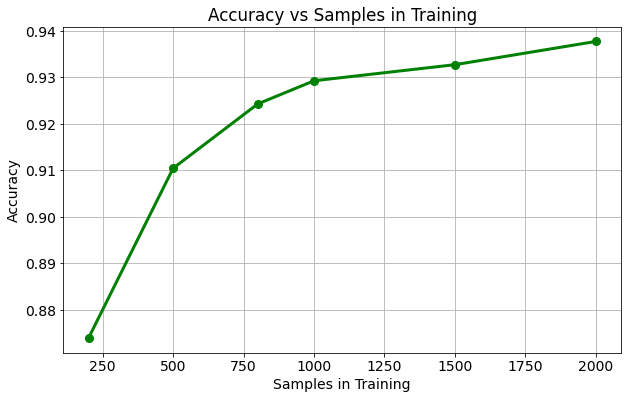

In [31]:
plt.rcParams["font.size"] = 14

plt.figure(figsize=(10,6))
plt.plot(n_values, accuracies, linewidth = 3, marker="o", color='g', markersize=8)
plt.title("Accuracy vs Samples in Training")
plt.ylabel('Accuracy')
plt.xlabel('Samples in Training')
plt.grid()
plt.savefig("plots/q1-acc-vs-samples.png", dpi = 200)